<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [29]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)


df.head(30)

branch_counts = df['MainBranch'].value_counts()
print("\nCounts of each MainBranch:")
print(branch_counts)


Counts of each MainBranch:
MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


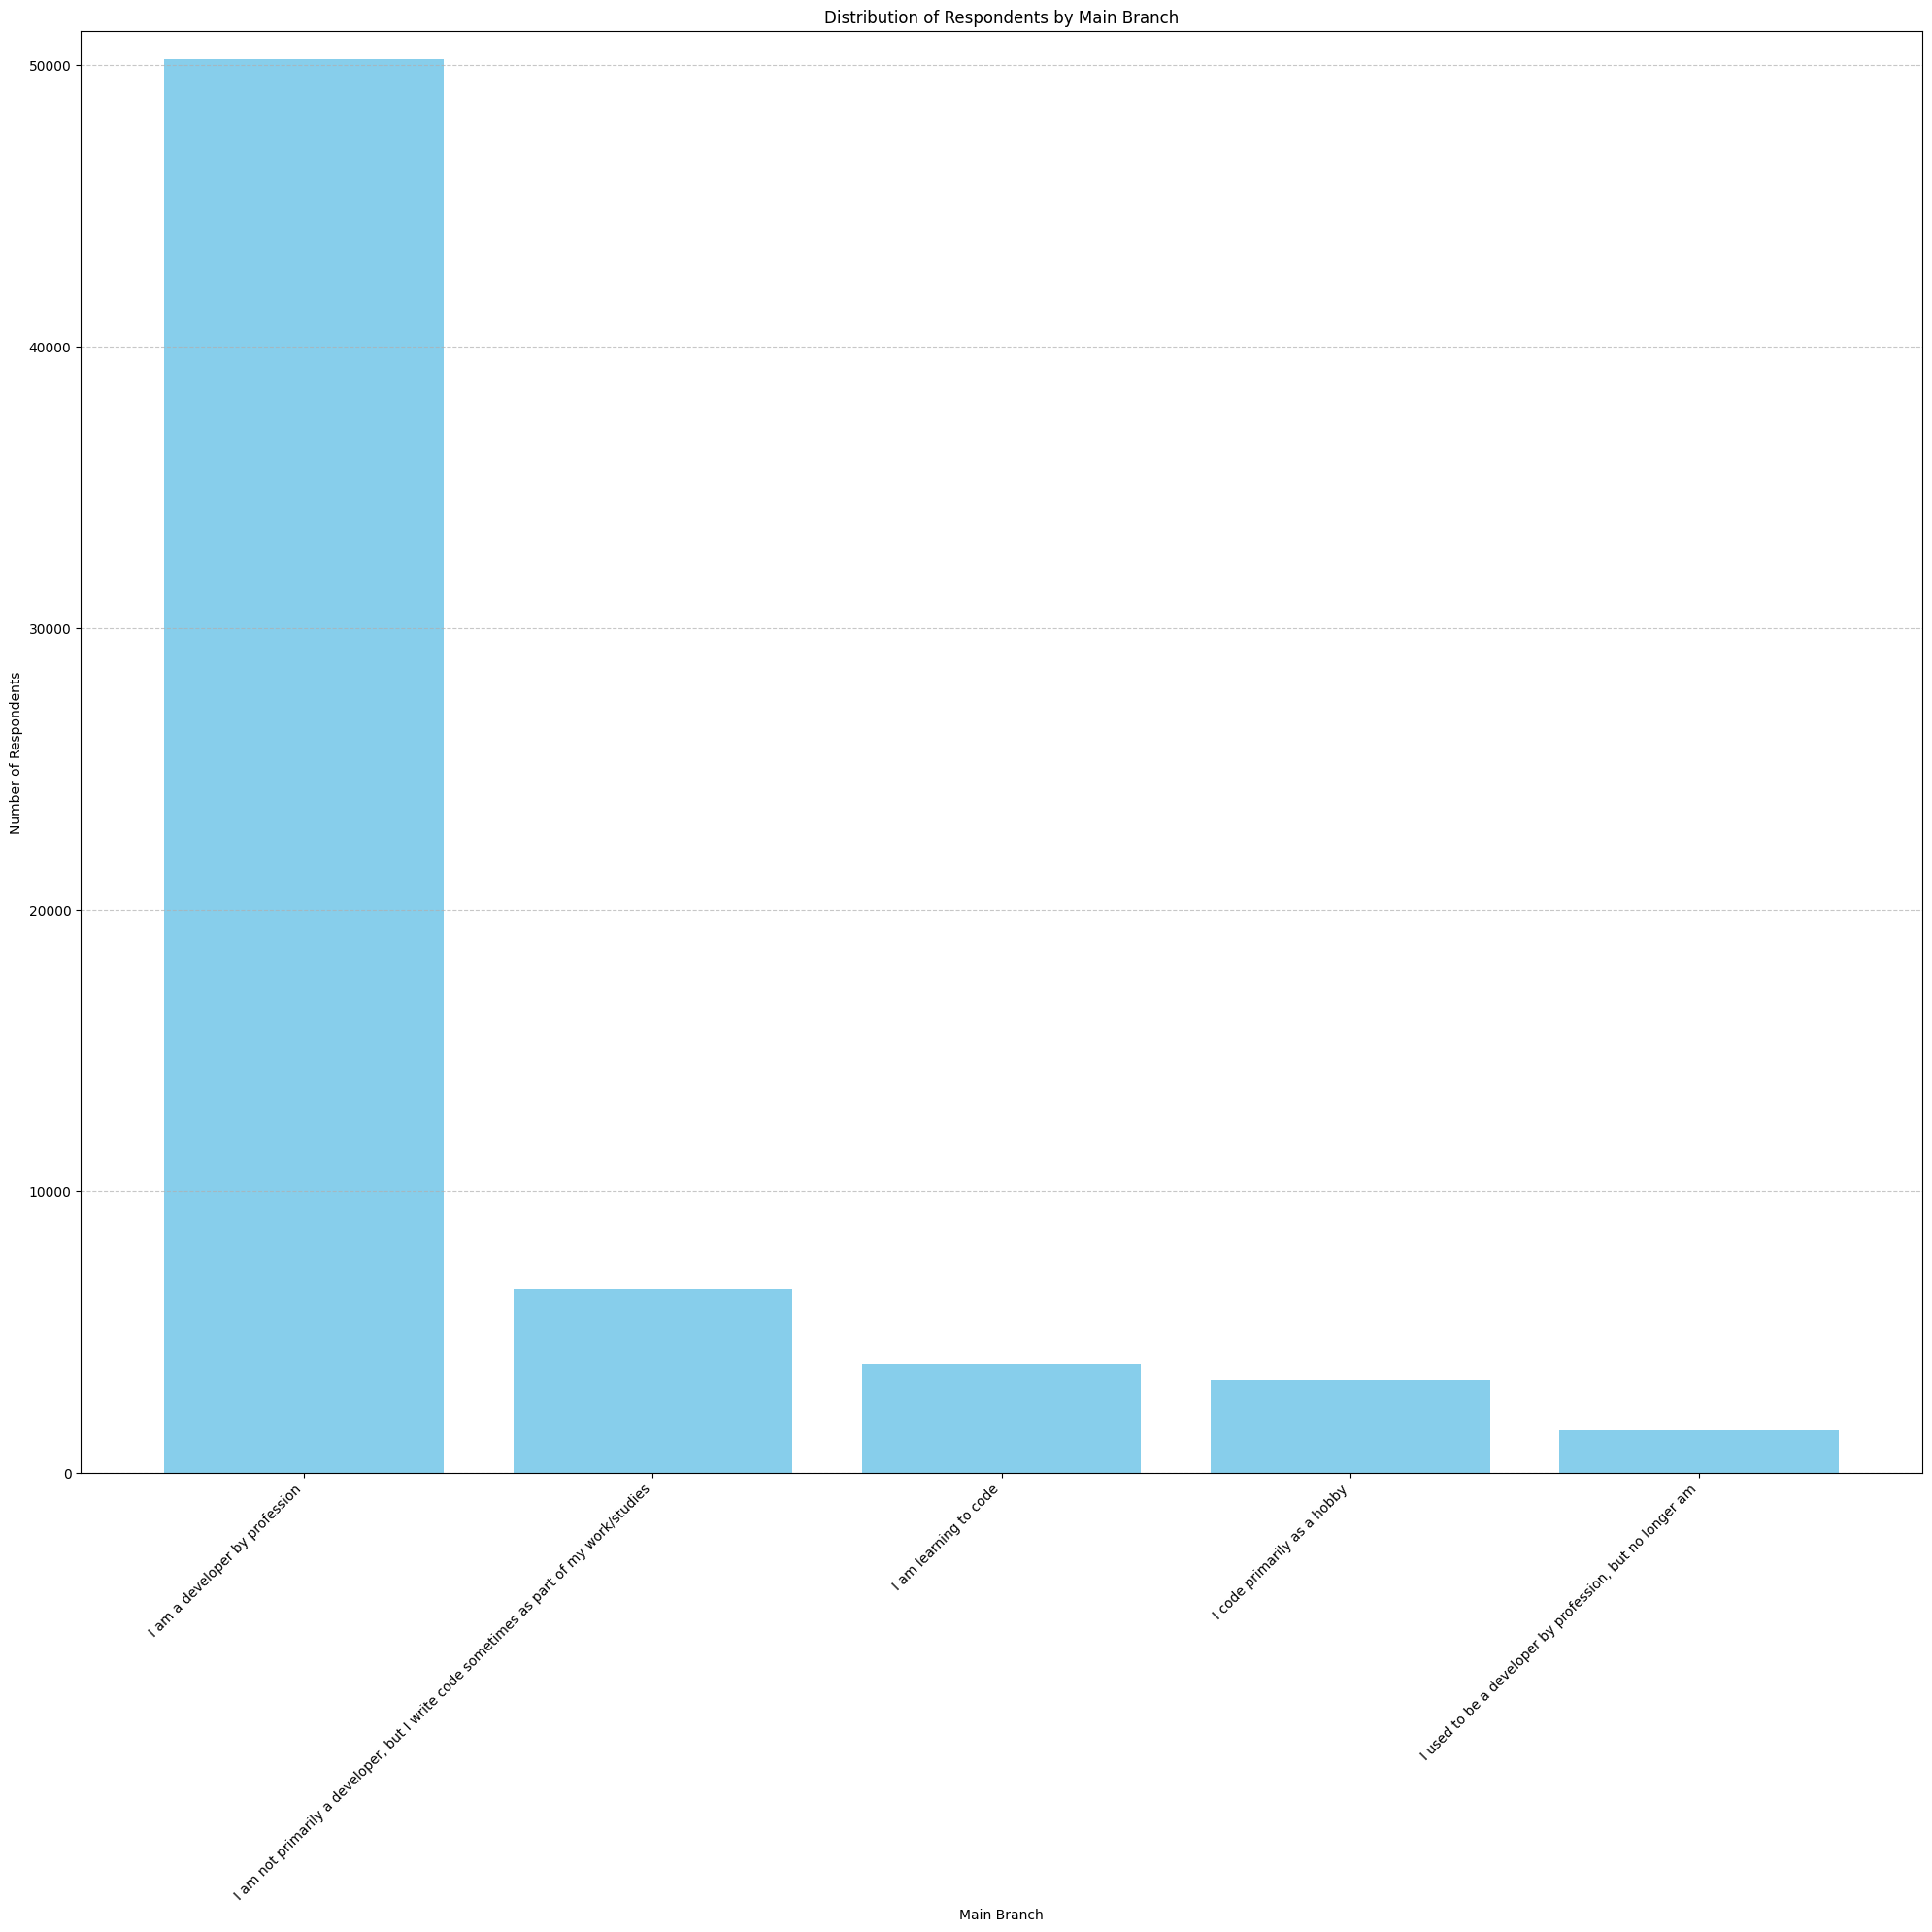

I am a developer by profession: 50207 respondents
I am not primarily a developer, but I write code sometimes as part of my work/studies: 6511 respondents
I am learning to code: 3875 respondents
I code primarily as a hobby: 3334 respondents
I used to be a developer by profession, but no longer am: 1510 respondents


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulated DataFrame with your actual counts for demonstration
data = {
    'MainBranch': [
        'I am a developer by profession', 
        'I am not primarily a developer, but I write code sometimes as part of my work/studies', 
        'I am learning to code', 
        'I code primarily as a hobby', 
        'I used to be a developer by profession, but no longer am'
    ],
    'Counts': [50207, 6511, 3875, 3334, 1510]
}
df = pd.DataFrame(data)

# Step 1: Count occurrences of each MainBranch if reading from your actual data
# branch_counts = df['MainBranch'].value_counts()  # Uncomment if using your actual dataset

# Step 2: Create a DataFrame for visualization
# For now, we'll use the simulated DataFrame with counts
# branch_counts = df['Counts']  # Replace with actual counts from your data if necessary

# Step 3: Create a bar chart to visualize the distribution
plt.figure(figsize=(20, 20))
plt.bar(df['MainBranch'], df['Counts'], color='skyblue')

# Customize the plot
plt.title('Distribution of Respondents by Main Branch')
plt.xlabel('Main Branch')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.ylim(0, max(df['Counts']) + 1000)  # Set y-axis limit to accommodate all counts
plt.show()

# Highlight notable trends
for branch, count in zip(df['MainBranch'], df['Counts']):
    print(f"{branch}: {count} respondents")


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [42]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)
value_counts = df['ConvertedCompYearly'].value_counts()

print("Counts of unique values in ConvertedCompYearly:")
print(value_counts)

mean_salary = df['ConvertedCompYearly'].mean()
median_salary = df['ConvertedCompYearly'].median()
std_salary = df['ConvertedCompYearly'].std()

print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(f"Standard Deviation: {std_salary}")

threshold = mean_salary + (3 * std_salary)
print(f"Outlier Threshold: {threshold}")

high_comp_outliers = df[df['ConvertedCompYearly'] > threshold]
print(high_comp_outliers)

Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print(outliers)

Counts of unique values in ConvertedCompYearly:
ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
           ... 
9711.0        1
950000.0      1
51448.0       1
447569.0      1
4738.0        1
Name: count, Length: 6113, dtype: int64
Mean Salary: 86155.28726264134
Median Salary: 65000.0
Standard Deviation: 186756.97308629757
Outlier Threshold: 646426.2065215341
       ResponseId                                         MainBranch  \
529           530                     I am a developer by profession   
828           829                     I am a developer by profession   
1932         1933                     I am a developer by profession   
2171         2172                     I am a developer by profession   
2187         2188                     I am a developer by profession   
...           ...                                                ...   
38219       38220  I am not primarily a developer, but I write co...   
39643     

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1: 32712.0, Q3: 107971.5, IQR: 75259.5
Q1: 32712.0, Q3: 107971.5, IQR: 75259.5
Number of outliers: 978


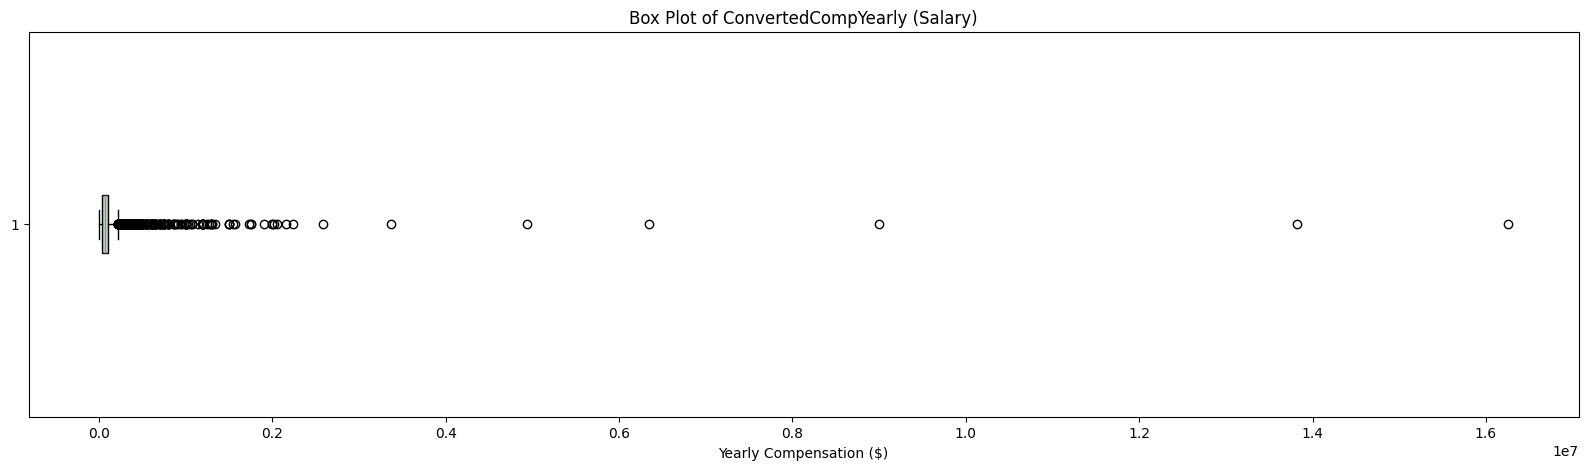

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64
ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
           ... 
9711.0        1
950000.0      1
51448.0       1
447569.0      1
4738.0        1
Name: count, Length: 6113, dtype: int64


In [49]:
import numpy as np
import matplotlib.pyplot as plt
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

df = df.dropna(subset=['ConvertedCompYearly'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Compute the IQR
IQR = Q3 - Q1
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

import numpy as np
import matplotlib.pyplot as plt

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Compute the IQR
IQR = Q3 - Q1
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

plt.figure(figsize=(20, 5))
plt.boxplot(df['ConvertedCompYearly'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot of ConvertedCompYearly (Salary)")
plt.xlabel("Yearly Compensation ($)")
plt.show()

print(df['ConvertedCompYearly'].describe())  # Summary stats
print(df['ConvertedCompYearly'].value_counts())  # Check actual values


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


(22457, 114)
count     22457.000000
mean      71347.201897
std       51271.396445
min           1.000000
25%       32000.000000
50%       63694.000000
75%      101281.000000
max      220207.000000
Name: ConvertedCompYearly, dtype: float64
Cleaned dataset saved successfully!


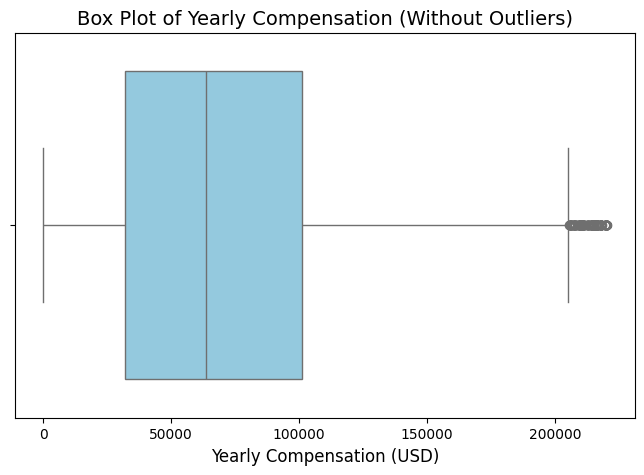

In [53]:
# Remove outliers
cleaned_df = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Display basic info
print(cleaned_df.shape)  # See how many rows remain
print(cleaned_df['ConvertedCompYearly'].describe())  # Check new summary stats

cleaned_df.to_csv("cleaned_salary_data.csv", index=False)
print("Cleaned dataset saved successfully!")

import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 5))

# Create the box plot
sns.boxplot(x=cleaned_df['ConvertedCompYearly'], color='skyblue')

# Add title & labels
plt.title("Box Plot of Yearly Compensation (Without Outliers)", fontsize=14)
plt.xlabel("Yearly Compensation (USD)", fontsize=12)

# Show the plot
plt.show()

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


Age_numeric            1.000000
WorkExp                0.846269
ConvertedCompYearly    0.122096
JobSat                 0.070664
CompTotal             -0.003890
JobSatPoints_1        -0.035870
ResponseId            -0.042142
JobSatPoints_8        -0.052320
JobSatPoints_6        -0.053532
JobSatPoints_4        -0.071597
JobSatPoints_9        -0.086692
JobSatPoints_7        -0.088198
JobSatPoints_5        -0.098819
JobSatPoints_11       -0.108578
JobSatPoints_10       -0.115898
Name: Age_numeric, dtype: float64


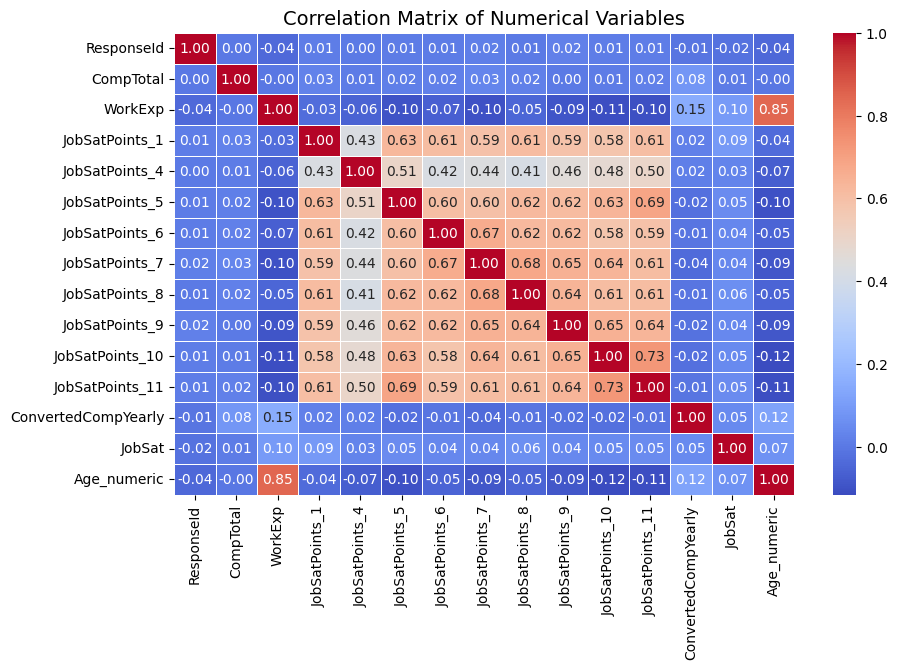

In [55]:
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None  # or you can map it to a specific value if you prefer
}

# Apply mapping to the Age column
df['Age_numeric'] = df['Age'].map(age_mapping)

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Display correlations of Age with other numerical columns
print(correlation_matrix['Age_numeric'].sort_values(ascending=False))

import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Matrix of Numerical Variables", fontsize=14)

# Show the plot
plt.show()


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
